# Stock Price Prediction Using LSTM

Predicting Closing Stock Price of a corporation, using the past 60 days stock price. Here we are going to predict Apple Inc. stock price. We are going to use an artificial recurrent neural network, called long short term memory networks.

## Libraries

In [2]:
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pdr.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557463
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624951
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765112
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898557
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878098
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.519104
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.688614
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.595123


## Visualise Close price history

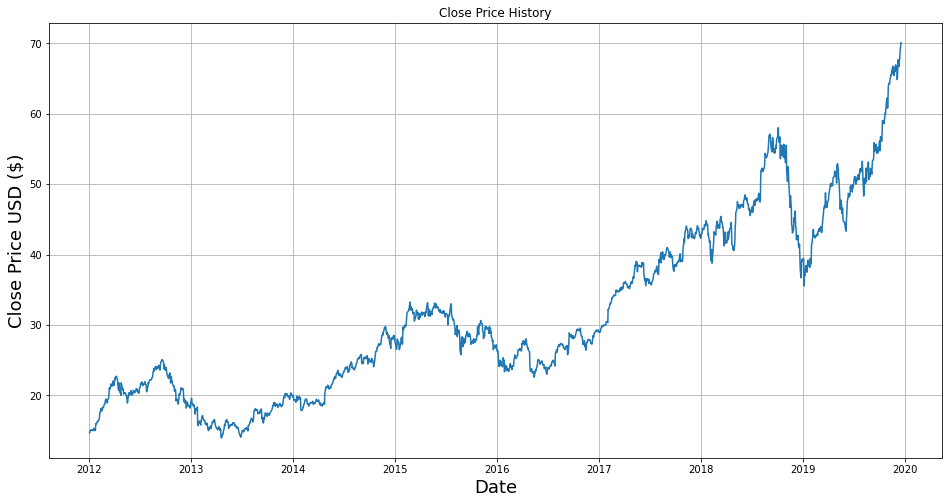

In [5]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.grid(True)
plt.show()

In [6]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8) # 80%

training_data_len

1603

In [7]:
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [8]:
train_data = scaled_data[:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the data
# No. of samples, no. of timesteps, no.of features
# lstm expects dataset to have 3 dimensions

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

## Model initialisation

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Train the model

In [15]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 49s 28ms/step - loss: 8.3046e-04


In [16]:
test_data = scaled_data[training_data_len -60:, :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])
    
x_test, y_test

([array([0.51322235, 0.51958863, 0.53294452, 0.54839284, 0.54581069,
         0.54460864, 0.53071854, 0.53610544, 0.53882114, 0.53815331,
         0.53085209, 0.53935536, 0.55288929, 0.56063573, 0.5528448 ,
         0.5460333 , 0.54696818, 0.54416348, 0.53205414, 0.53178703,
         0.51411273, 0.50333899, 0.4859318 , 0.52079068, 0.50106844,
         0.49278779, 0.49857536, 0.49367817, 0.50129106, 0.51562638,
         0.52092423, 0.50124656, 0.50868133, 0.5229276 , 0.51932152,
         0.52688985, 0.52951649, 0.53436918, 0.54514292, 0.5433621 ,
         0.52092423, 0.48940432, 0.4872674 , 0.47702787, 0.48018873,
         0.48272638, 0.47426767, 0.48735639, 0.50445198, 0.53770815,
         0.53913274, 0.57002938, 0.5759505 , 0.57991274, 0.5857448 ,
         0.59767603, 0.5912207 , 0.58926183, 0.58164901, 0.58939538]),
  array([0.51958863, 0.53294452, 0.54839284, 0.54581069, 0.54460864,
         0.53071854, 0.53610544, 0.53882114, 0.53815331, 0.53085209,
         0.53935536, 0.55288929,

In [17]:
x_test = np.array(x_test)

In [19]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(400, 60, 1)

## Prediction

In [20]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 19ms/step


In [21]:
# RMSE (root mean squared error)
# Good measure of how accurate the model predicts
# its the std dev of the predictions
# lower value means model performs better

rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

2.7568676155160037

## Visualizations

In [22]:
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions

C:\Users\ABCL\AppData\Local\Temp/ipykernel_13356/2069316301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


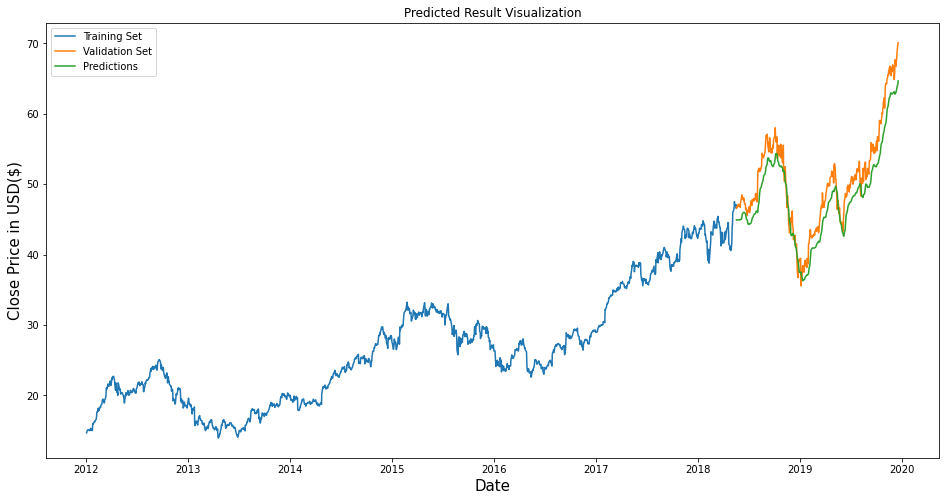

In [23]:
plt.figure(figsize=(16,8))
plt.title('Predicted Result Visualization')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price in USD($)', fontsize=15)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training Set', 'Validation Set', 'Predictions'])
plt.show()

In [24]:
# Show the validation and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,44.927685
2018-05-18,46.577499,44.951805
2018-05-21,46.907501,44.916557
2018-05-22,46.790001,44.899837
2018-05-23,47.090000,44.878033
...,...,...
2019-12-11,67.692497,63.364674
2019-12-12,67.864998,63.600342
2019-12-13,68.787498,63.847691


# Prediction for future

In [26]:
# Predict the closing price for AAPL stock for 2019-12-18
apple_quote = pdr.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

new_df = apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values # closing price for the last 60 days, in numpy array form

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 28ms/step


array([[65.174126]], dtype=float32)

In [27]:
# Comparing with actual value
apple_quote2 = pdr.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
